In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import seaborn as sns
from sklearn import preprocessing
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [74]:
df= pd.read_csv('molecule_complete.csv')

In [76]:
df.select_dtypes(include=[object])

,molecule_name,type,type_scc,atom_atom1_structure,atom
0,dsgdb9nsd_000001,1JHC,1JHC,H,C
1,dsgdb9nsd_000001,2JHH,2JHH,H,H
2,dsgdb9nsd_000001,2JHH,2JHH,H,H
3,dsgdb9nsd_000001,2JHH,2JHH,H,H
4,dsgdb9nsd_000001,1JHC,1JHC,H,C
...,...,...,...,...,...
4658142,dsgdb9nsd_133884,2JHC,2JHC,H,C
4658143,dsgdb9nsd_133884,3JHC,3JHC,H,C
4658144,dsgdb9nsd_133884,3JHC,3JHC,H,C
4658145,dsgdb9nsd_133884,2JHC,2JHC,H,C


In [60]:
df.columns

Index(['molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'potential_energy', 'X', 'Y', 'Z',
       'XX_atom1', 'YX_atom1', 'ZX_atom1', 'XY_atom1', 'YY_atom1', 'ZY_atom1',
       'XZ_atom1', 'YZ_atom1', 'ZZ_atom1', 'XX', 'YX', 'ZX', 'XY', 'YY', 'ZY',
       'XZ', 'YZ', 'ZZ', 'mulliken_charge_atom1', 'mulliken_charge',
       'type_scc', 'fc', 'sd', 'pso', 'dso', 'atom_atom1_structure',
       'x_atom1_structure', 'y_atom1_structure', 'z_atom1_structure', 'atom',
       'x', 'y', 'z'],
      dtype='object')

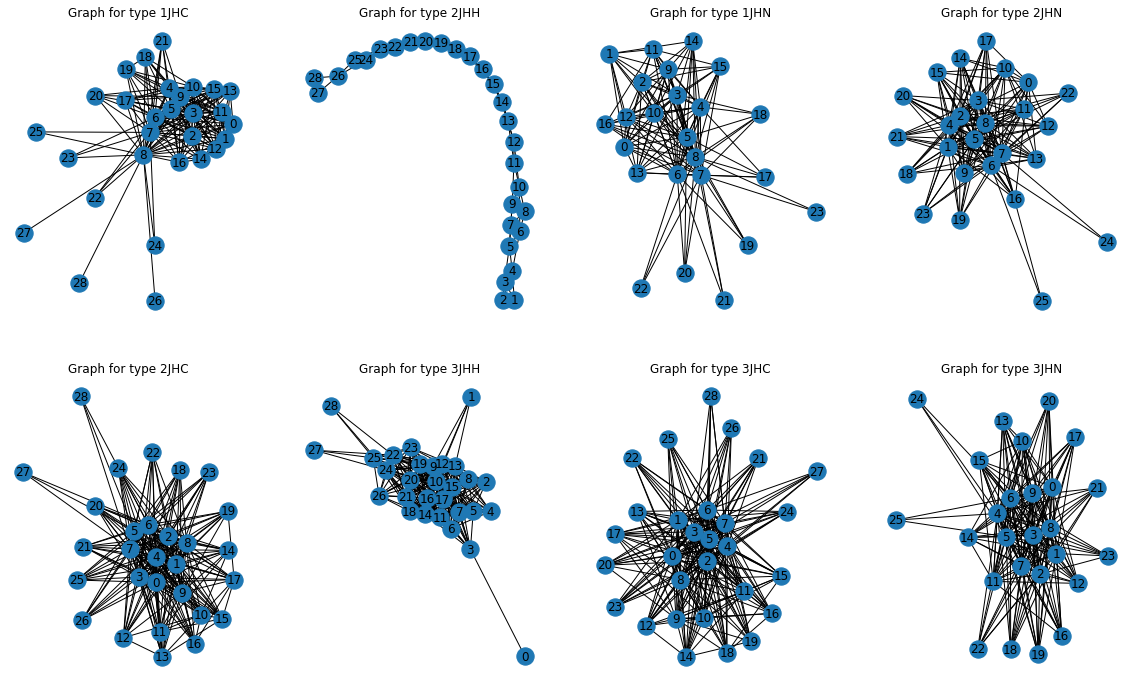

In [9]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

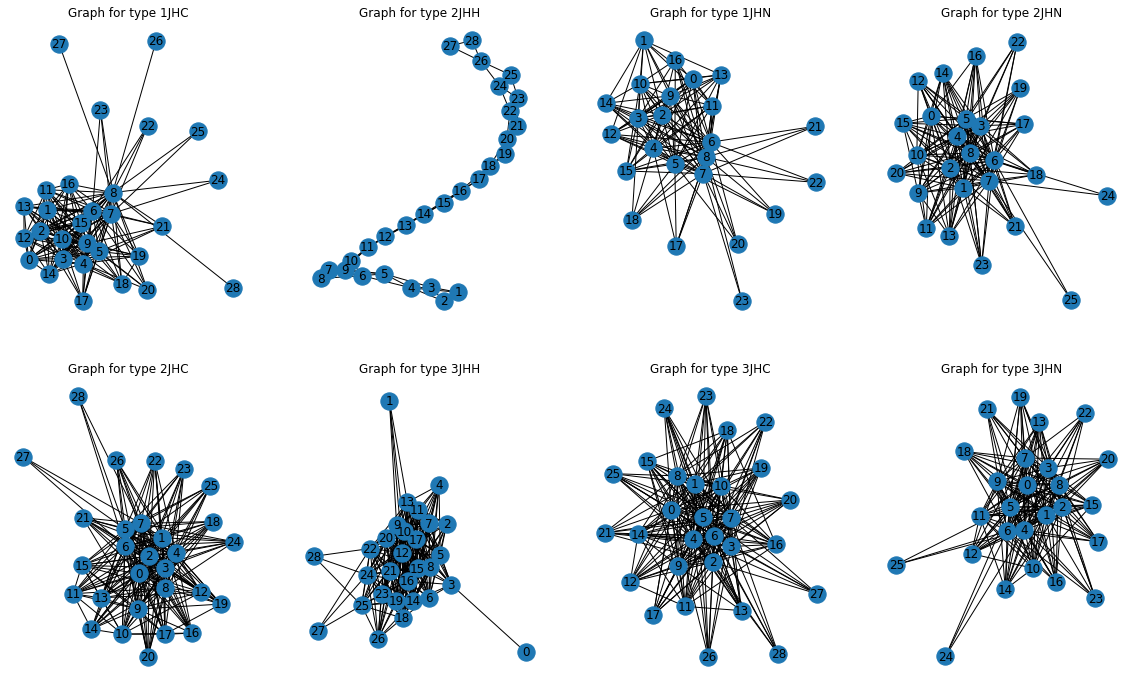

In [10]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['pso'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

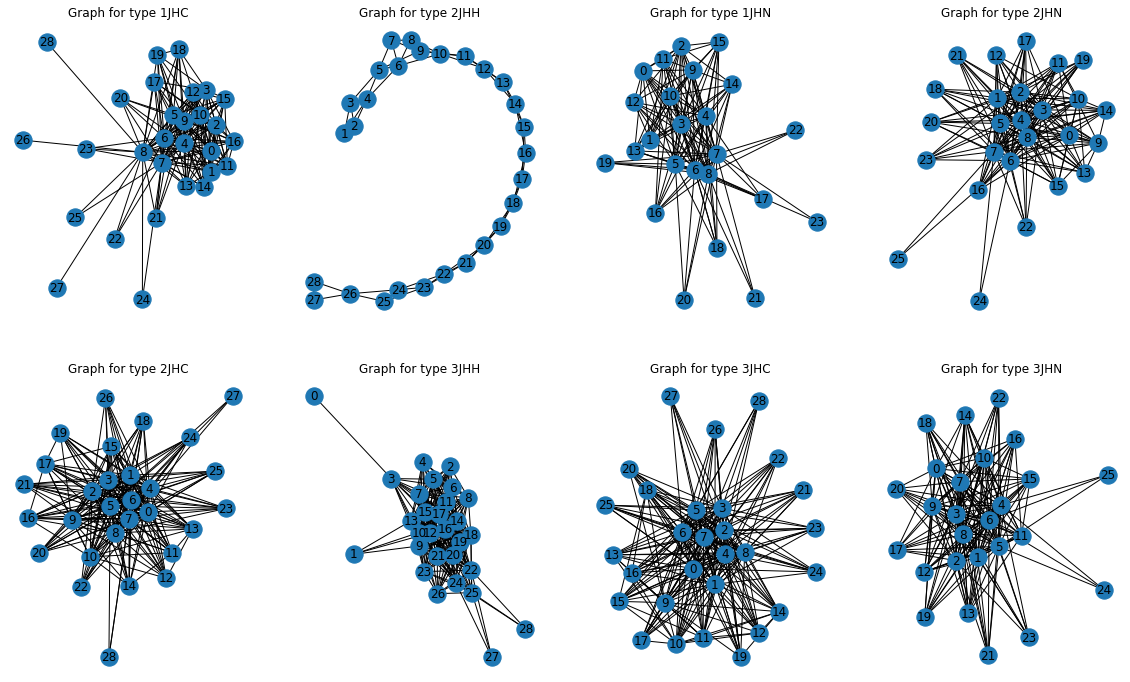

In [11]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['mulliken_charge'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

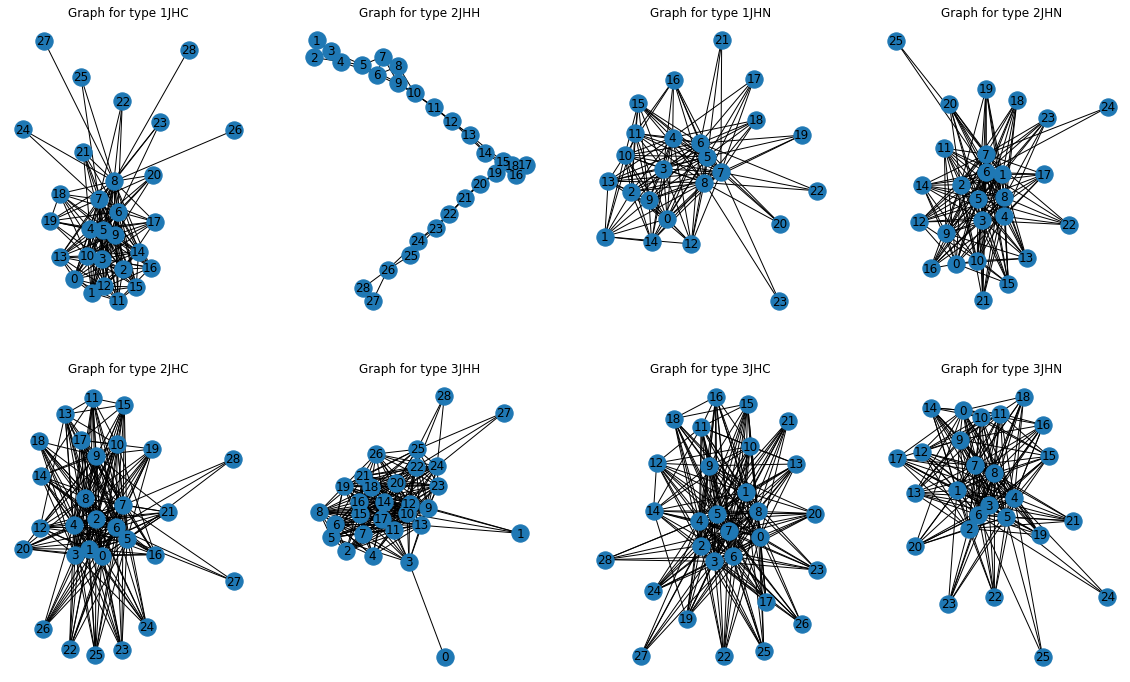

In [12]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['fc'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

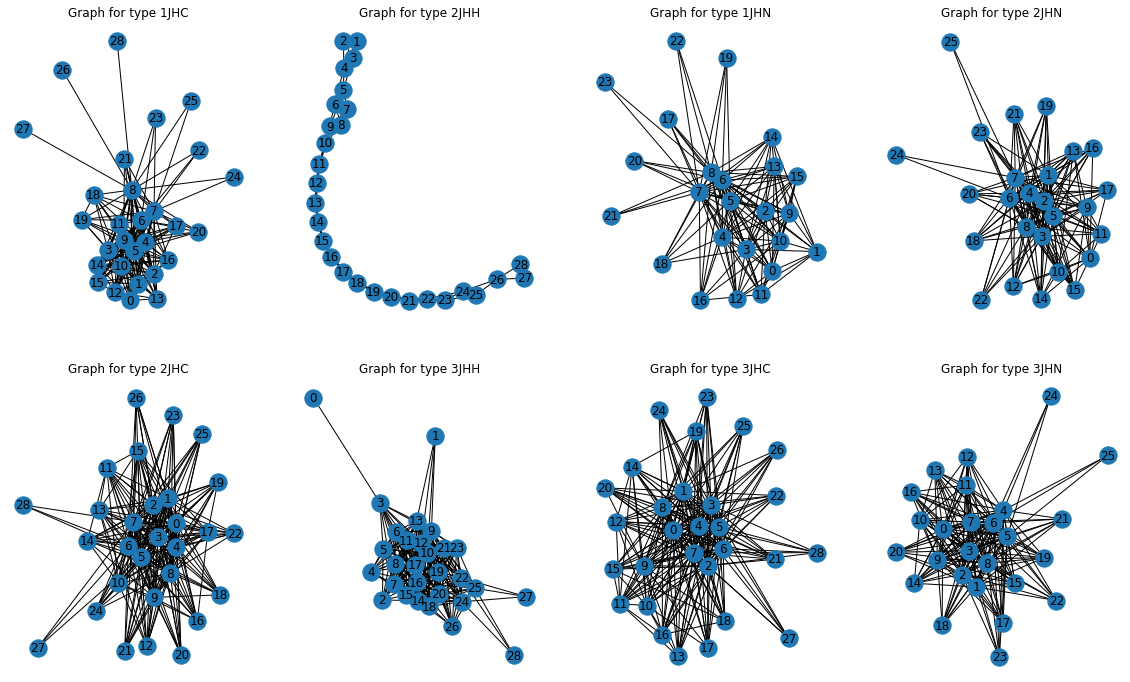

In [13]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['sd'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

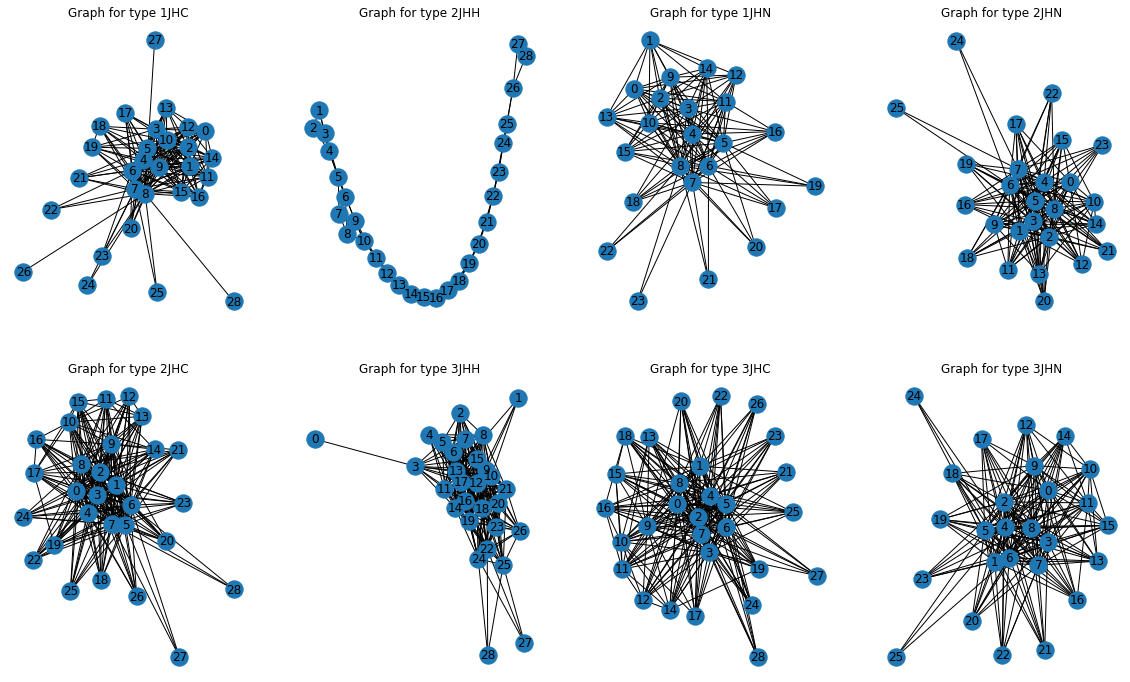

In [14]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['dso'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

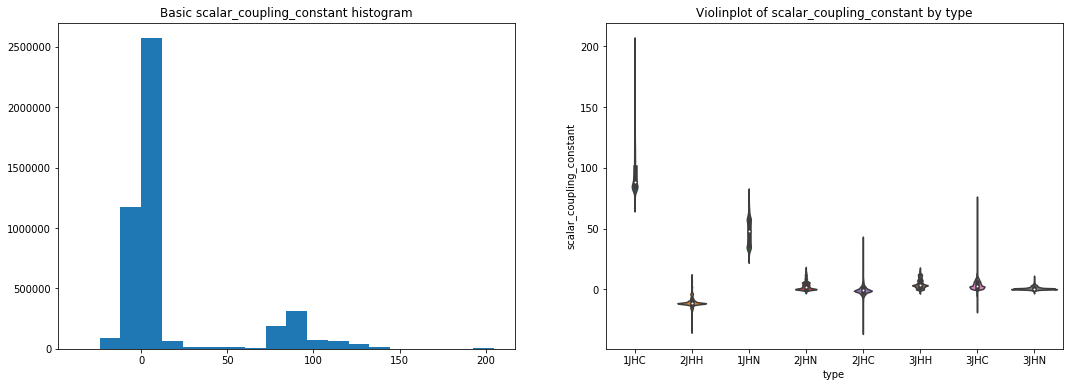

In [15]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(df['scalar_coupling_constant'], bins=20);
plt.title('Basic scalar_coupling_constant histogram');
plt.subplot(1, 2, 2);
sns.violinplot(x='type', y='scalar_coupling_constant', data=df);
plt.title('Violinplot of scalar_coupling_constant by type');

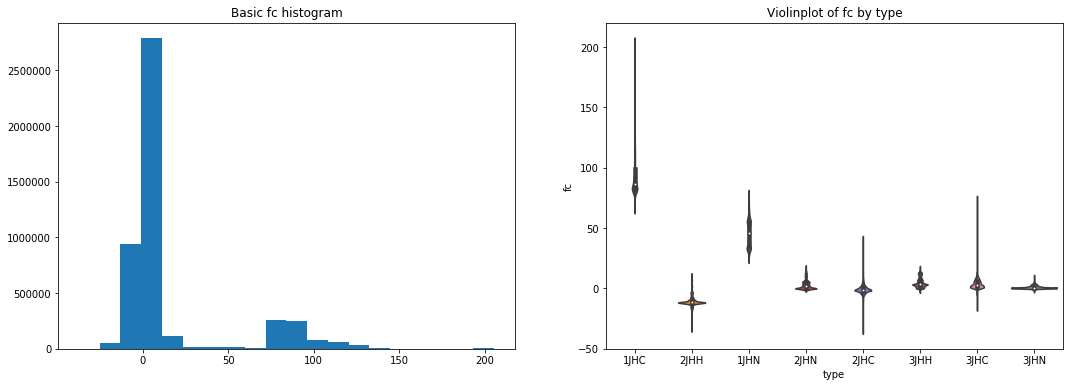

In [16]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(df['fc'], bins=20);
plt.title('Basic fc histogram');
plt.subplot(1, 2, 2);
sns.violinplot(x='type', y='fc', data=df);
plt.title('Violinplot of fc by type');

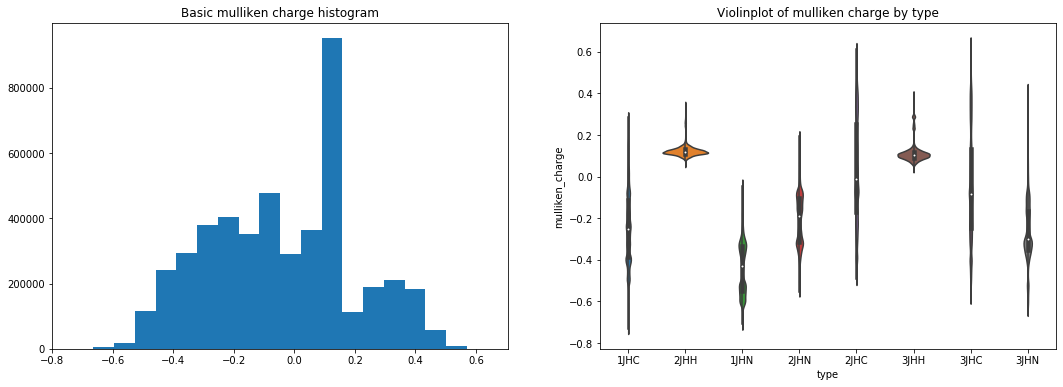

In [17]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(df['mulliken_charge'], bins=20);
plt.title('Basic mulliken charge histogram');
plt.subplot(1, 2, 2);
sns.violinplot(x='type', y='mulliken_charge', data=df);
plt.title('Violinplot of mulliken charge by type');

In [77]:
len(df.columns)

42

In [78]:
for f in ['type', 'type_scc', 'atom_atom1_structure', 'atom']:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df[f].values))
    df[f] = lbl.transform(list(df[f].values))

In [79]:
len(df.columns)

42

In [80]:
df.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,potential_energy,X,Y,Z,XX_atom1,...,pso,dso,atom_atom1_structure,x_atom1_structure,y_atom1_structure,z_atom1_structure,atom,x,y,z
0,dsgdb9nsd_000001,1,0,0,84.8076,-40.52368,0.0,0.0,0.0,31.3410,...,1.25862,0.272010,0,0.002150,-0.006031,0.001976,0,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,2,3,-11.2570,-40.52368,0.0,0.0,0.0,31.3410,...,2.85839,-3.433600,0,0.002150,-0.006031,0.001976,1,1.011731,1.463751,0.000277
2,dsgdb9nsd_000001,1,3,3,-11.2548,-40.52368,0.0,0.0,0.0,31.3410,...,2.85852,-3.433870,0,0.002150,-0.006031,0.001976,1,-0.540815,1.447527,-0.876644
3,dsgdb9nsd_000001,1,4,3,-11.2543,-40.52368,0.0,0.0,0.0,31.3410,...,2.85855,-3.433930,0,0.002150,-0.006031,0.001976,1,-0.523814,1.437933,0.906397
4,dsgdb9nsd_000001,2,0,0,84.8074,-40.52368,0.0,0.0,0.0,31.5814,...,1.25861,0.272013,0,1.011731,1.463751,0.000277,0,-0.012698,1.085804,0.008001
